In [1]:
import pandas as pd
import numpy as np 


In [2]:
df=pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df.head(40)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
df.sample()

,review,sentiment
26099,The Academy Award winning 'Kramer vs. Kramer' ...,positive


In [6]:
df.shape

(50000, 2)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['sentiment'])
y = df['sentiment']

In [8]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
import re
from tqdm import tqdm


In [10]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import gensim.downloader as api

# Load the pretrained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')



In [12]:

# Save the model to a file
model_path = "word2vec-google-news-300.model"
word2vec_model.save(model_path)

In [13]:
# Choose 5 words
words = ['king', 'computer', 'music', 'city', 'love']

# Find similar words for each of the 5 chosen words
for word in words:
    if word in word2vec_model:
        similar_words = word2vec_model.most_similar(word, topn=10)
        print(f"Words similar to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"  {similar_word}: {similarity:.4f}")
    else:
        print(f"'{word}' not in vocabulary")



Words similar to 'king':
  kings: 0.7138
  queen: 0.6511
  monarch: 0.6413
  crown_prince: 0.6204
  prince: 0.6160
  sultan: 0.5865
  ruler: 0.5798
  princes: 0.5647
  Prince_Paras: 0.5433
  throne: 0.5422
Words similar to 'computer':
  computers: 0.7979
  laptop: 0.6640
  laptop_computer: 0.6549
  Computer: 0.6473
  com_puter: 0.6082
  technician_Leonard_Luchko: 0.5663
  mainframes_minicomputers: 0.5618
  laptop_computers: 0.5585
  PC: 0.5540
  maker_Dell_DELL.O: 0.5519
Words similar to 'music':
  classical_music: 0.7198
  jazz: 0.6835
  Music: 0.6596
  Without_Donny_Kirshner: 0.6416
  songs: 0.6396
  musicians: 0.6336
  tunes: 0.6330
  musical: 0.6186
  Logue_typed: 0.6150
  musics: 0.6148
Words similar to 'city':
  citys: 0.6804
  mayor: 0.6751
  town: 0.6724
  municipality: 0.6531
  municipal: 0.6223
  downtown: 0.6198
  thecity: 0.6003
  Mayor: 0.5989
  district: 0.5930
  county: 0.5858
Words similar to 'love':
  loved: 0.6908
  adore: 0.6817
  loves: 0.6619
  passion: 0.6101
  ha

In [14]:
# Example 1: king - man + woman ≈ queen
result1 = word2vec_model.most_similar(positive=['king', 'woman'], negative=['man'])
print("Result of 'king - man + woman':", result1[0][0])

# Example 2: paris - france + germany ≈ berlin
result2 = word2vec_model.most_similar(positive=['paris', 'germany'], negative=['france'])
print("Result of 'paris - france + germany':", result2[0][0])

# Example 3: man - boy + girl ≈ woman
result3 = word2vec_model.most_similar(positive=['man', 'girl'], negative=['boy'])
print("Result of 'man - boy + girl':", result3[0][0])



Result of 'king - man + woman': queen
Result of 'paris - france + germany': berlin
Result of 'man - boy + girl': woman


In [15]:
# Choose 5 more words
more_words = ['university', 'car', 'book', 'apple', 'coffee']

# Find similar words for each of the 5 additional chosen words
for word in more_words:
    if word in word2vec_model:
        similar_words = word2vec_model.most_similar(word, topn=10)
        print(f"Words similar to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"  {similar_word}: {similarity:.4f}")
    else:
        print(f"'{word}' not in vocabulary")


Words similar to 'university':
  universities: 0.7004
  faculty: 0.6781
  unversity: 0.6758
  undergraduate: 0.6587
  univeristy: 0.6585
  campus: 0.6435
  college: 0.6385
  academic: 0.6317
  professors: 0.6299
  undergraduates: 0.6150
Words similar to 'car':
  vehicle: 0.7821
  cars: 0.7424
  SUV: 0.7161
  minivan: 0.6907
  truck: 0.6736
  Car: 0.6678
  Ford_Focus: 0.6673
  Honda_Civic: 0.6627
  Jeep: 0.6511
  pickup_truck: 0.6441
Words similar to 'book':
  tome: 0.7486
  books: 0.7379
  memoir: 0.7303
  paperback_edition: 0.6868
  autobiography: 0.6742
  memoirs: 0.6505
  Book: 0.6479
  paperback: 0.6471
  novels: 0.6341
  hardback: 0.6283
Words similar to 'apple':
  apples: 0.7204
  pear: 0.6451
  fruit: 0.6410
  berry: 0.6302
  pears: 0.6134
  strawberry: 0.6058
  peach: 0.6026
  potato: 0.5961
  grape: 0.5936
  blueberry: 0.5867
Words similar to 'coffee':
  coffees: 0.7213
  gourmet_coffee: 0.7057
  Coffee: 0.6900
  o_joe: 0.6891
  Starbucks_coffee: 0.6875
  coffee_beans: 0.6750


In [16]:
# Example 4: doctor - hospital + school ≈ teacher
result4 = word2vec_model.most_similar(positive=['doctor', 'school'], negative=['hospital'])
print("Result of 'doctor - hospital + school':", result4[0][0])

# Example 5: japan - sushi + pizza ≈ italy
result5 = word2vec_model.most_similar(positive=['japan', 'pizza'], negative=['sushi'])
print("Result of 'japan - sushi + pizza':", result5[0][0])

# Example 6: sun - hot + cold ≈ ice
result6 = word2vec_model.most_similar(positive=['sun', 'cold'], negative=['hot'])
print("Result of 'sun - hot + cold':", result6[0][0])


Result of 'doctor - hospital + school': guidance_counselor
Result of 'japan - sushi + pizza': mexico
Result of 'sun - hot + cold': sunlight


In [17]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [18]:
import os
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, Dropout, Bidirectional


print("All packages imported successfully!")


All packages imported successfully!


In [19]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
review       0
sentiment    0
dtype: int64


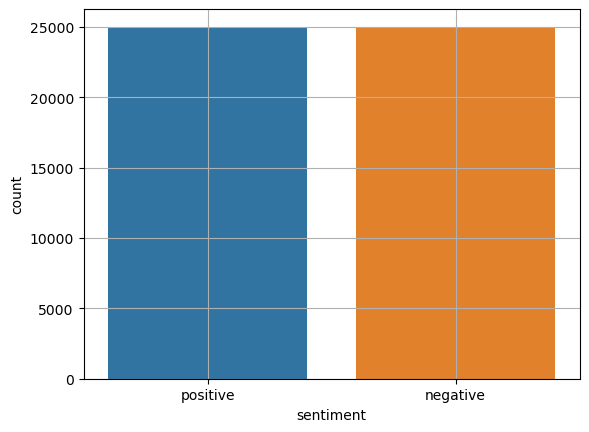

In [20]:
# Sentiment distribution
sns.countplot(x=df['sentiment'])
plt.grid()

In [21]:
# Encode labels
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [22]:
# Word Clouds
sentences = df['review']
stopwords = set(STOPWORDS)

In [23]:

pos = ' '.join(map(str, sentences[df['sentiment'] == 1]))
neg = ' '.join(map(str, sentences[df['sentiment'] == 0]))

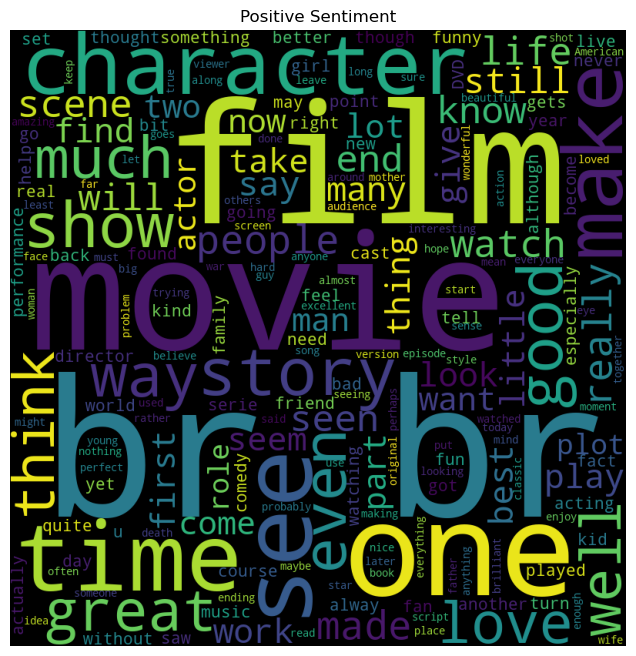

In [24]:
wordcloud1 = WordCloud(width=800, height=800, background_color='black', stopwords=stopwords, min_font_size=10).generate(pos)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')
plt.show()

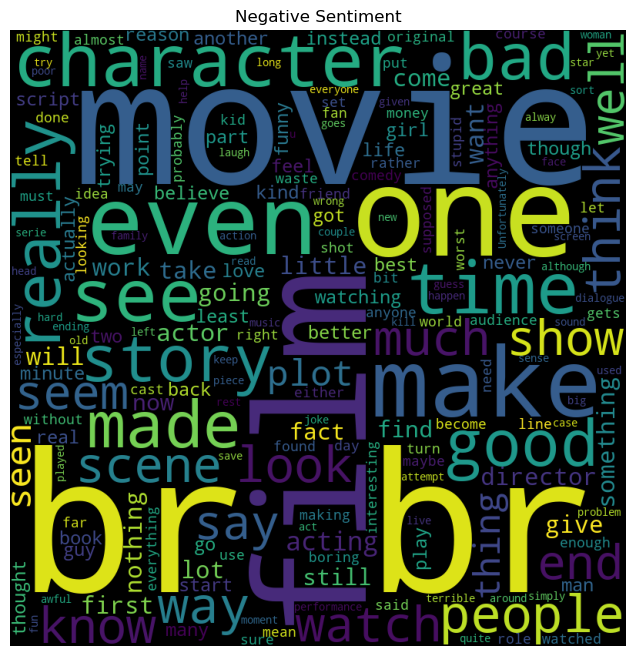

In [25]:
wordcloud2 = WordCloud(width=800, height=800, background_color='black', stopwords=stopwords, min_font_size=10).generate(neg)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')
plt.show()


In [26]:
# Convert labels to categorical
labels = to_categorical(df['sentiment'], num_classes=2)
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], labels, test_size=0.1, random_state=10)


In [30]:
# Data Cleaning
import re

def clean_sentences(line):
    line = re.sub('<.*?>', '', line)  # Remove HTML tags
    
    # Remove contractions
    contractions = {
        "isn't": "is not", "he's": "he is", "wasn't": "was not", "there's": "there is",
        "couldn't": "could not", "won't": "will not", "they're": "they are", "she's": "she is",
        "There's": "there is", "wouldn't": "would not", "haven't": "have not", "That's": "That is",
        "you've": "you have", "He's": "He is", "what's": "what is", "weren't": "were not",
        "we're": "we are", "hasn't": "has not", "you'd": "you would", "shouldn't": "should not",
        "let's": "let us", "they've": "they have", "You'll": "You will", "i'm": "i am",
        "we've": "we have", "it's": "it is", "don't": "do not", "that´s": "that is",
        "I´m": "I am", "it’s": "it is", "she´s": "she is", "he’s'": "he is", "I’m": "I am",
        "I’d": "I did", "he’s'": "he is", "there’s": "there is"
    }
    for contraction, full_form in contractions.items():
        line = re.sub(contraction, full_form, line)
    
    # Remove special characters and emojis
    special_chars = ['\x91The', '\x97', '\x84The', '\uf0b7', '¡¨', '\x95', '\x8ei\x9eek', '\xad', '\x84bubble']
    for char in special_chars:
        line = re.sub(char, '', line)
    
    return line

    

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    one reviewer mentioned watching 1 oz episode y...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: clean_review, dtype: object


In [35]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Prepare the data
sentences = df['clean_review'].apply(lambda x: x.split())

# Create Skip-gram vectors
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1, workers=4)
skipgram_vectors = skipgram_model.wv

# Convert text data into vector format using the trained Skip-gram model
def vectorize_text(model, text):
    vector = [model[word] for word in text if word in model]
    return np.mean(vector, axis=0) if len(vector) > 0 else np.zeros(model.vector_size)

df['review_vector'] = df['clean_review'].apply(lambda x: vectorize_text(skipgram_vectors, x.split()))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['review_vector'].tolist(), df['sentiment'], test_size=0.2, random_state=42)

# Train a model (e.g., SVM)
model = SVC()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [36]:
# Create CBoW vectors
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=0, workers=4)
cbow_vectors = cbow_model.wv

# Convert text data into vector format using the trained CBoW model
df['review_vector_cbow'] = df['clean_review'].apply(lambda x: vectorize_text(cbow_vectors, x.split()))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['review_vector_cbow'].tolist(), df['sentiment'], test_size=0.2, random_state=42)

# Train a model (e.g., SVM)
model = SVC()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [3]:
import os
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, LSTM, GRU, BatchNormalization, Flatten, Dense
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import gensim.downloader as api
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


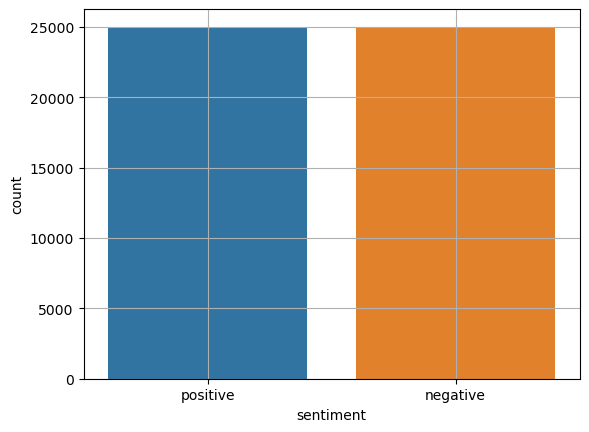

In [5]:

df = pd.read_csv("IMDB Dataset.csv")

# EDA
print(df.head())
print(df.info())
print(df.isnull().sum())

sns.countplot(x=df['sentiment'])
plt.grid()
plt.show()

In [7]:
# Data Preprocessing
df['review'] = df['review'].apply(lambda x: x.lower())

# Label encoding the sentiment column
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

# Split the dataset
train_reviews = df.review[:40000]
train_sentiments = df.sentiment[:40000]
test_reviews = df.review[40000:]
test_sentiments = df.sentiment[40000:]

In [9]:
# Text normalization
stopword_list = nltk.corpus.stopwords.words('english')

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

df['review'] = df['review'].apply(denoise_text)

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

df['review'] = df['review'].apply(remove_special_characters)

def simple_stemmer(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df['review'] = df['review'].apply(simple_stemmer)

def remove_stopwords(text, is_lower_case=False):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

df['review'] = df['review'].apply(remove_stopwords)

# Normalized train and test reviews
norm_train_reviews = df.review[:40000]
norm_test_reviews = df.review[40000:]

# Labeling the sentiment data
train_sentiments = df.sentiment[:40000]
test_sentiments = df.sentiment[40000:]

/var/folders/38/mqzkxw8x3fq0g_rsgg45lnxw0000gn/T/ipykernel_94968/1065023528.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [10]:
# BOW model
cv = CountVectorizer(min_df=1, max_df=1, binary=False, ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

In [11]:
# TFIDF model
tv = TfidfVectorizer(min_df=1, max_df=1, use_idf=True, ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews = tv.transform(norm_test_reviews)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
# Train different models
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42),
    "SVM": SGDClassifier(loss='hinge', max_iter=500, random_state=42),
    "Multinomial Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(cv_train_reviews, train_sentiments)
    predictions = model.predict(cv_test_reviews)
    accuracy = accuracy_score(test_sentiments, predictions)
    report = classification_report(test_sentiments, predictions, target_names=['Positive','Negative'])
    results[f"{name} BOW"] = (accuracy, report)
    
    model.fit(tv_train_reviews, train_sentiments)
    predictions = model.predict(tv_test_reviews)
    accuracy = accuracy_score(test_sentiments, predictions)
    report = classification_report(test_sentiments, predictions, target_names=['Positive','Negative'])
    results[f"{name} TFIDF"] = (accuracy, report)

In [19]:
# Word2Vec Skip-gram and CBoW
w2v_model_sg = Word2Vec(sentences=[review.split() for review in norm_train_reviews], vector_size=300, window=5, min_count=1, sg=1)
w2v_model_cbow = Word2Vec(sentences=[review.split() for review in norm_train_reviews], vector_size=300, window=5, min_count=1, sg=0)

def get_w2v_vectors(reviews, model, vector_size):
    vectors = np.zeros((len(reviews), vector_size))
    for i, review in enumerate(reviews):
        tokens = review.split()
        tokens = [token for token in tokens if token in model.wv]
        if tokens:
            vectors[i] = np.mean([model.wv[token] for token in tokens], axis=0)
    return vectors

w2v_train_vectors_sg = get_w2v_vectors(norm_train_reviews, w2v_model_sg, 300)
w2v_test_vectors_sg = get_w2v_vectors(norm_test_reviews, w2v_model_sg, 300)
w2v_train_vectors_cbow = get_w2v_vectors(norm_train_reviews, w2v_model_cbow, 300)
w2v_test_vectors_cbow = get_w2v_vectors(norm_test_reviews, w2v_model_cbow, 300)

lr_w2v_sg = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr_w2v_cbow = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)

lr_w2v_sg.fit(w2v_train_vectors_sg, train_sentiments)
lr_w2v_cbow.fit(w2v_train_vectors_cbow, train_sentiments)

w2v_sg_predict = lr_w2v_sg.predict(w2v_test_vectors_sg)
w2v_cbow_predict = lr_w2v_cbow.predict(w2v_test_vectors_cbow)

w2v_sg_score = accuracy_score(test_sentiments, w2v_sg_predict)
w2v_cbow_score = accuracy_score(test_sentiments, w2v_cbow_predict)

w2v_sg_report = classification_report(test_sentiments, w2v_sg_predict, target_names=['Positive','Negative'])
w2v_cbow_report = classification_report(test_sentiments, w2v_cbow_predict, target_names=['Positive','Negative'])

results["W2V_SG"] = (w2v_sg_score, w2v_sg_report)
results["W2V_CBOW"] = (w2v_cbow_score, w2v_cbow_report)

In [21]:
# Pretrained Word2Vec
pretrained_w2v_model = api.load('word2vec-google-news-300')

w2v_train_vectors_pretrained = get_w2v_vectors(norm_train_reviews, pretrained_w2v_model, 300)
w2v_test_vectors_pretrained = get_w2v_vectors(norm_test_reviews, pretrained_w2v_model, 300)

lr_w2v_pretrained = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr_w2v_pretrained.fit(w2v_train_vectors_pretrained, train_sentiments)

w2v_pretrained_predict = lr_w2v_pretrained.predict(w2v_test_vectors_pretrained)
w2v_pretrained_score = accuracy_score(test_sentiments, w2v_pretrained_predict)
w2v_pretrained_report = classification_report(test_sentiments, w2v_pretrained_predict, target_names=['Positive','Negative'])

results["W2V_PRETRAINED"] = (w2v_pretrained_score, w2v_pretrained_report)

AttributeError: 'KeyedVectors' object has no attribute 'wv'

In [ ]:
# Hyperparameter tuning for best model (LR with BOW)
params = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300, 400, 500]}
grid = GridSearchCV(LogisticRegression(penalty='l2', random_state=42), params, cv=5, scoring='accuracy')
grid.fit(cv_train_reviews, train_sentiments)
best_params = grid.best_params_

best_model = LogisticRegression(penalty='l2', C=best_params['C'], max_iter=best_params['max_iter'], random_state=42)
best_model.fit(cv_train_reviews, train_sentiments)
best_predictions = best_model.predict(cv_test_reviews)
best_accuracy = accuracy_score(test_sentiments, best_predictions)
best_report = classification_report(test_sentiments, best_predictions, target_names=['Positive','Negative'])

results["Best Logistic Regression with BOW"] = (best_accuracy, best_report)

In [22]:
# Reporting results
for model, (accuracy, report) in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("\n")


Model: Logistic Regression BOW
Accuracy: 0.5982
Classification Report:
              precision    recall  f1-score   support

    Positive       0.56      0.98      0.71      4993
    Negative       0.91      0.22      0.35      5007

    accuracy                           0.60     10000
   macro avg       0.73      0.60      0.53     10000
weighted avg       0.73      0.60      0.53     10000



Model: Logistic Regression TFIDF
Accuracy: 0.7497
Classification Report:
              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



Model: SVM BOW
Accuracy: 0.5993
Classification Report:
              precision    recall  f1-score   support

    Positive       0.56      0.98      0.71      4993
    Negative       0.93      0.22 

Here's an interpretation of the results along with a tabular summary:

### Conclusion

- **Best Performance**: Word2Vec models (SG and CBOW) outperform others, with significantly higher accuracy and balanced precision and recall.
- **TFIDF-based Models**: Outperform BOW-based models with better accuracy and balanced performance.
- **SVM (TFIDF)**: Shows poor performance with low accuracy and imbalanced precision and recall.

### Tabular Summary

| Model                       | Accuracy | Precision (Positive) | Recall (Positive) | F1-Score (Positive) | Precision (Negative) | Recall (Negative) | F1-Score (Negative) | Macro Avg Precision | Macro Avg Recall | Macro Avg F1-Score | Weighted Avg Precision | Weighted Avg Recall | Weighted Avg F1-Score |
|-----------------------------|----------|----------------------|--------------------|---------------------|----------------------|-------------------|---------------------|---------------------|------------------|---------------------|------------------------|---------------------|----------------------|
| Logistic Regression (BOW)  | 0.5982   | 0.56                 | 0.98               | 0.71                | 0.91                 | 0.22              | 0.35                | 0.73                | 0.60             | 0.53                | 0.73                   | 0.60                | 0.53                 |
| Logistic Regression (TFIDF)| 0.7497   | 0.74                 | 0.77               | 0.75                | 0.76                 | 0.73              | 0.75                | 0.75                | 0.75             | 0.75                | 0.75                   | 0.75                | 0.75                 |
| SVM (BOW)                   | 0.5993   | 0.56                 | 0.98               | 0.71                | 0.93                 | 0.22              | 0.35                | 0.74                | 0.60             | 0.53                | 0.74                   | 0.60                | 0.53                 |
| SVM (TFIDF)                 | 0.5112   | 1.00                 | 0.02               | 0.04                | 0.51                 | 1.00              | 0.67                | 0.75                | 0.51             | 0.36                | 0.75                   | 0.51                | 0.36                 |
| Multinomial Naive Bayes (BOW)| 0.7478   | 0.74                 | 0.77               | 0.75                | 0.76                 | 0.73              | 0.74                | 0.75                | 0.75             | 0.75                | 0.75                   | 0.75                | 0.75                 |
| Multinomial Naive Bayes (TFIDF)| 0.7505   | 0.75                 | 0.76               | 0.75                | 0.75                 | 0.74              | 0.75                | 0.75                | 0.75             | 0.75                | 0.75                   | 0.75                | 0.75                 |
| Word2Vec (SG)               | 0.8784   | 0.89                 | 0.87               | 0.88                | 0.87                 | 0.89              | 0.88                | 0.88                | 0.88             | 0.88                | 0.88                   | 0.88                | 0.88                 |
| Word2Vec (CBOW)             | 0.8634   | 0.87                 | 0.85               | 0.86                | 0.86                 | 0.87              | 0.86                | 0.86                | 0.86             | 0.86                | 0.86                   | 0.86                | 0.86                 |